In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta 
from matplotlib import dates as mpl_dates
import datetime as dt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo
import folium

In [14]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61896,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61897,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
61898,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [15]:
df.columns.str.replace(r'\n','', regex=True)
df.columns = df.columns.str.replace(r'\n','', regex=True)
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [16]:
df.groupby('dateRep')['cases','deaths'].sum()



C:\Users\user\AppData\Local\Temp/ipykernel_13388/2686529373.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,cases,deaths
dateRep,,
2019-12-31,27,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,17,0
2020-01-04,0,0
...,...,...
2020-12-10,676114,12376
2020-12-11,693352,12327
2020-12-12,657140,12355


In [17]:
df1 = df.groupby('countryterritoryCode')['cases','deaths'].sum()
df1

C:\Users\user\AppData\Local\Temp/ipykernel_13388/700283943.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,cases,deaths
countryterritoryCode,,
ABW,5049,46
AFG,49273,1971
AGO,16188,371
AIA,10,0
ALB,48530,1003
...,...,...
XKX,46580,1198
YEM,2083,606
ZAF,860964,23276


In [18]:
df2 = df.groupby('countriesAndTerritories')['cases','deaths'].sum()
df2

C:\Users\user\AppData\Local\Temp/ipykernel_13388/2603487581.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,cases,deaths
countriesAndTerritories,,
Afghanistan,49273,1971
Albania,48530,1003
Algeria,92102,2596
Andorra,7338,79
Angola,16188,371
...,...,...
Wallis_and_Futuna,3,0
Western_Sahara,766,1
Yemen,2083,606


In [19]:
sorted_df2 = df2.sort_values('cases', ascending= False).reset_index()
sorted_df2

,countriesAndTerritories,cases,deaths
0,United_States_of_America,16256754,299177
1,India,9884100,143355
2,Brazil,6901952,181402
3,Russia,2653928,46941
4,France,2376852,57911
...,...,...,...
209,Montserrat,13,1
210,Anguilla,10,0
211,Marshall_Islands,4,0
212,Wallis_and_Futuna,3,0


In [20]:
sorted_df3 = df2.sort_values('deaths', ascending= False).reset_index()
sorted_df3

,countriesAndTerritories,cases,deaths
0,United_States_of_America,16256754,299177
1,Brazil,6901952,181402
2,India,9884100,143355
3,Mexico,1250044,113953
4,Italy,1843712,64520
...,...,...,...
209,Cambodia,359,0
210,Seychelles,187,0
211,Saint_Vincent_and_the_Grenadines,98,0
212,Saint_Kitts_and_Nevis,27,0


In [21]:
sorted_df3 = df2.sort_values('deaths', ascending= False).reset_index()
sorted_df3

,countriesAndTerritories,cases,deaths
0,United_States_of_America,16256754,299177
1,Brazil,6901952,181402
2,India,9884100,143355
3,Mexico,1250044,113953
4,Italy,1843712,64520
...,...,...,...
209,Cambodia,359,0
210,Seychelles,187,0
211,Saint_Vincent_and_the_Grenadines,98,0
212,Saint_Kitts_and_Nevis,27,0


In [25]:
sorted_d = df1.sort_values('cases', ascending= False).reset_index()
sorted_d

,countryterritoryCode,cases,deaths
0,USA,16256754,299177
1,IND,9884100,143355
2,BRA,6901952,181402
3,RUS,2653928,46941
4,FRA,2376852,57911
...,...,...,...
207,SLB,17,0
208,MSF,13,1
209,AIA,10,0
210,MHL,4,0


In [26]:
ddlj = pd.merge(sorted_df2, sorted_d)
ddlj

,countriesAndTerritories,cases,deaths,countryterritoryCode
0,United_States_of_America,16256754,299177,USA
1,India,9884100,143355,IND
2,Brazil,6901952,181402,BRA
3,Russia,2653928,46941,RUS
4,France,2376852,57911,FRA
...,...,...,...,...
209,Solomon_Islands,17,0,SLB
210,Montserrat,13,1,MSF
211,Anguilla,10,0,AIA
212,Marshall_Islands,4,0,MHL


In [27]:
fig = go.Figure(data=go.Choropleth(
    locations = ddlj['countryterritoryCode'],
    z = ddlj['cases'],
    text = ddlj['countriesAndTerritories'],
  colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.04, 'rgb(51,160,44)'],
            [0.05, 'rgb(178,223,138)'], [0.06, 'rgb(51,160,44)'],
            [0.07, 'rgb(251,154,153)'], [0.1, 'rgb(255,255,0)'],
            [0.13, 'rgb(251,154,153)'], [0.15, 'rgb(255,255,0)'],
            [0.16, 'rgb(178,223,138)'], [0.17, 'rgb(51,160,44)'],
            [0.18, 'rgb(251,154,153)'], [0.19, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
    autocolorscale=False,
    reversescale=False,
    marker_line_color='black',
    marker_line_width=1,
    colorbar_title = 'Confirmed Cases',
))

fig.update_layout(
    title_text='Worldwide COVID19 Confirmed Cases',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='Dr. Sachin Subedi',
        showarrow = False
    )]
)


In [28]:
fig = go.Figure(data=go.Choropleth(
    locations = ddlj['countryterritoryCode'],
    z = ddlj['cases'],
    text = ddlj['countriesAndTerritories'],
   colorscale = [[0,"rgb(5, 10, 172)"],[0.15,"rgb(40, 60, 190)"],[0.45,"rgb(70, 100, 245)"],\
                        [0.55,"rgb(90, 120, 245)"],[0.65,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
    autocolorscale=False,
    reversescale=True,
    marker_line_color='black',
    marker_line_width=0.5,
    colorbar_title = 'Confirmed cases',
))

fig.update_layout(
    title_text='Worldwide COVID19 cases',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='Dr. Sachin Subedi',
        showarrow = False
    )]
)

fig.show()

In [29]:
fig = go.Figure(data=go.Choropleth(
    locations = ddlj['countryterritoryCode'],
    z = ddlj['deaths'],
    text = ddlj['countriesAndTerritories'],
  colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.04, 'rgb(51,160,44)'],
            [0.05, 'rgb(178,223,138)'], [0.06, 'rgb(51,160,44)'],
            [0.07, 'rgb(251,154,153)'], [0.1, 'rgb(255,255,0)'],
            [0.13, 'rgb(251,154,153)'], [0.15, 'rgb(255,255,0)'],
            [0.16, 'rgb(178,223,138)'], [0.17, 'rgb(51,160,44)'],
            [0.18, 'rgb(251,154,153)'], [0.19, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
    autocolorscale=False,
    reversescale=False,
    marker_line_color='black',
    marker_line_width=1,
    colorbar_title = 'Deaths',
))

fig.update_layout(
    title_text='Worldwide COVID19 Deaths',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0,
        y=-0.1,
        xref='paper',
        yref='paper',
        text='Dr. Sachin Subedi',
        showarrow = False
    )]
)

fig.show()

In [30]:
sorted_dd2 = df2.sort_values('deaths', ascending= False).reset_index().head(10)
sorted_dd2

,countriesAndTerritories,cases,deaths
0,United_States_of_America,16256754,299177
1,Brazil,6901952,181402
2,India,9884100,143355
3,Mexico,1250044,113953
4,Italy,1843712,64520
5,United_Kingdom,1849403,64170
6,France,2376852,57911
7,Iran,1108269,52196
8,Spain,1730575,47624
9,Russia,2653928,46941


In [32]:
fig = px.scatter(sorted_dd2,  x='countriesAndTerritories', y='deaths', size='deaths', 
                 color='countriesAndTerritories', hover_name='countriesAndTerritories', size_max=60)


fig.update_layout(title_text='Top 10 worst affected countries', template='plotly_dark'
            
)

fig.update_layout(
    annotations=[
        dict(
            x=-0.06,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper"
            )
            ,   
    ],

)

fig.show()

In [33]:
fig = px.bar(
    sorted_dd2,
    x = "countriesAndTerritories",
    y = "deaths", 
    title= "Top 10 worst affected countries",
   color_discrete_sequence=["brown"], 
    height=550,
    width=850,
    text='deaths'
)
fig.update_traces(texttemplate='%{text:.2.5s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(template='plotly_dark')

fig.update_layout(
    annotations=[
        dict(
            x=-0.1,
            y=-0.25,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)
fig.show()

In [34]:
sorted_d2 = df2.sort_values('cases', ascending= False).reset_index().head(10)
sorted_d2

,countriesAndTerritories,cases,deaths
0,United_States_of_America,16256754,299177
1,India,9884100,143355
2,Brazil,6901952,181402
3,Russia,2653928,46941
4,France,2376852,57911
5,United_Kingdom,1849403,64170
6,Italy,1843712,64520
7,Spain,1730575,47624
8,Argentina,1498160,40766
9,Colombia,1425774,39053


In [36]:
fig = px.scatter(sorted_d2,  x='countriesAndTerritories', y='cases', size='cases', 
                 color='countriesAndTerritories', hover_name='countriesAndTerritories', size_max=60)
fig.update_layout(title_text='Top 10 worst affected countries'
            
)

fig.update_layout(
    annotations=[
        dict(
            x=-0.05,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

fig.show()

In [37]:
fig = px.bar(
    sorted_d2,
    x = "countriesAndTerritories",
    y = "cases", 
    title= "Top 10 worst affected countries",
   color_discrete_sequence=["blue"], 
    height=550,
    width=850,
    text='cases'
)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

fig.update_layout(
    annotations=[
        dict(
            x=-0.1,
            y=-0.25,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)
fig.show()

In [38]:
ts = df.groupby('dateRep')['cases','deaths'].sum().reset_index()
ts

C:\Users\user\AppData\Local\Temp/ipykernel_13388/3923326545.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,dateRep,cases,deaths
0,2019-12-31,27,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,17,0
4,2020-01-04,0,0
...,...,...,...
345,2020-12-10,676114,12376
346,2020-12-11,693352,12327
347,2020-12-12,657140,12355
348,2020-12-13,626421,10254


In [39]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [40]:
plt.style.use('bmh')

In [41]:
fig = px.bar(
    ts,
    x = "dateRep",
    y = "cases",
    title= "Daily worldwide new cases",
   color_discrete_sequence=["blue"], 
    height=500,
    width=800)

fig.show()

In [42]:
fig = px.line(
    ts,
    x = "dateRep",
    y = "cases",
    title= "Daily worldwide new cases",
   color_discrete_sequence=["blue"], 
    height=500,
    width=800)

fig.update_layout(
    annotations=[
        dict(
            x=-0.1,
            y=-0.2,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)


In [43]:
fig = px.bar(
    ts,
    x = "dateRep",
    y = "deaths",
    title= "Daily Worldwide deaths",
   color_discrete_sequence=["red"], 
    height=500,
    width=800)

fig.show()

In [44]:
fig = px.line(
    ts,
    x = "dateRep",
    y = "deaths",
    title= "Daily Worldwide deaths",
   color_discrete_sequence=["red"], 
    height=500,
    width=800)

fig.update_layout(
    annotations=[
        dict(
            x=-0.1,
            y=-0.2,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
            )
            ,   
    ],

)

In [45]:
trace0 = go.Scatter(
x= ts.dateRep,
y= ts.cases,
mode = 'lines',
name = 'cases'
)

trace1 = go.Scatter(
x= ts.dateRep,
y= ts.deaths,
mode = 'lines',
name = 'deaths'
)

data = [trace0, trace1] 
layout = go.Layout(title = 'Daily Covid 19 scenario')
figure = go.Figure(data=data, layout=layout)

figure.update_layout(
    annotations=[
        dict(
            x=-0.07,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
           )
            ,   
    ],

)

figure.update_xaxes(title_text="Date")

figure.update_yaxes(title_text="Number of Casualties")

In [46]:
ts['Cases'] = ts['cases'].cumsum()
ts['Deaths'] = ts['deaths'].cumsum()

trace0 = go.Scatter(
x= ts.dateRep,
y= ts.Cases,
mode = 'lines',
name = 'Cases'
)

trace1 = go.Scatter(
x= ts.dateRep,
y= ts.Deaths,
mode = 'lines',
name = 'Deaths'
)

data = [trace0, trace1] 
layout = go.Layout(title = 'Daily Covid 19 scenario')
figure = go.Figure(data=data, layout=layout)

figure.update_layout(
    annotations=[
        dict(
            x=-0.07,
            y=-0.15,
            showarrow=False,
            text="Dr. Sachin Subedi",
            xref="paper",
            yref="paper",
           )
            ,   
    ],

)

figure.update_xaxes(title_text="Date")

figure.update_yaxes(title_text="Number of Casualties")

In [47]:
ts['cases_date'] = pd.to_datetime(ts['dateRep'])

In [48]:
ts2 = ts.set_index('cases_date')
ts2

,dateRep,cases,deaths,Cases,Deaths
cases_date,,,,,
2019-12-31,2019-12-31,27,0,27,0
2020-01-01,2020-01-01,0,0,27,0
2020-01-02,2020-01-02,0,0,27,0
2020-01-03,2020-01-03,17,0,44,0
2020-01-04,2020-01-04,0,0,44,0
...,...,...,...,...,...
2020-12-10,2020-12-10,676114,12376,68986042,1570812
2020-12-11,2020-12-11,693352,12327,69679394,1583139
2020-12-12,2020-12-12,657140,12355,70336534,1595494


Text(0.5, 1.0, 'Worst affected nations')

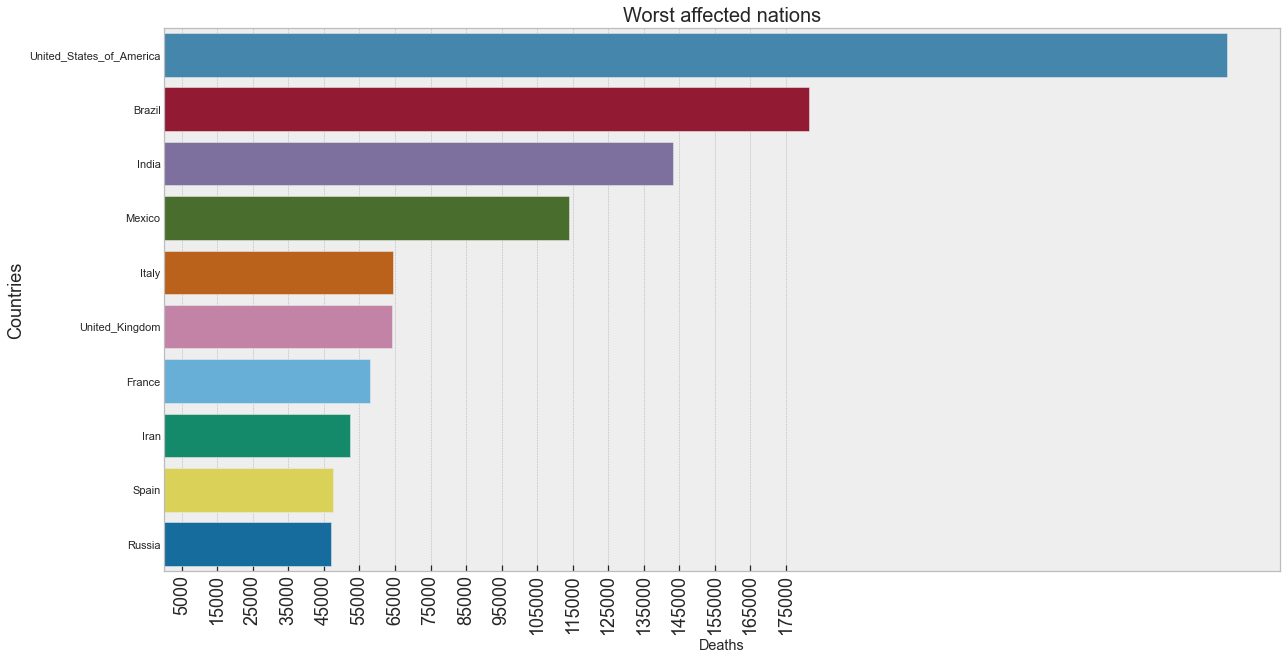

In [49]:
plt.figure(figsize=(20,10))
sns.barplot(data=sorted_dd2,x='deaths', y='countriesAndTerritories', orient='h')
plt.xlabel("Deaths")
plt.xticks([i for i in range(5000, 180000, 10000)], rotation=90, fontsize=18)
plt.ylabel("Countries", fontsize=18)
plt.title('Worst affected nations', fontsize=20)

In [50]:
NP = (df.loc[df['countriesAndTerritories'] == 'Nepal'])
NP1 = NP.groupby('dateRep')['cases','deaths'].sum().reset_index()
NP1

C:\Users\user\AppData\Local\Temp/ipykernel_13388/113336482.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,dateRep,cases,deaths
0,2019-12-31,0,0
1,2020-01-01,0,0
2,2020-01-02,0,0
3,2020-01-03,0,0
4,2020-01-04,0,0
...,...,...,...
332,2020-12-10,1056,14
333,2020-12-11,1217,12
334,2020-12-12,1044,11
335,2020-12-13,899,15


In [51]:
NP2= NP1.set_index('dateRep')
NP2

,cases,deaths
dateRep,,
2019-12-31,0,0
2020-01-01,0,0
2020-01-02,0,0
2020-01-03,0,0
2020-01-04,0,0
...,...,...
2020-12-10,1056,14
2020-12-11,1217,12
2020-12-12,1044,11


Text(0.5, 1.0, 'Daily cases in Nepal')

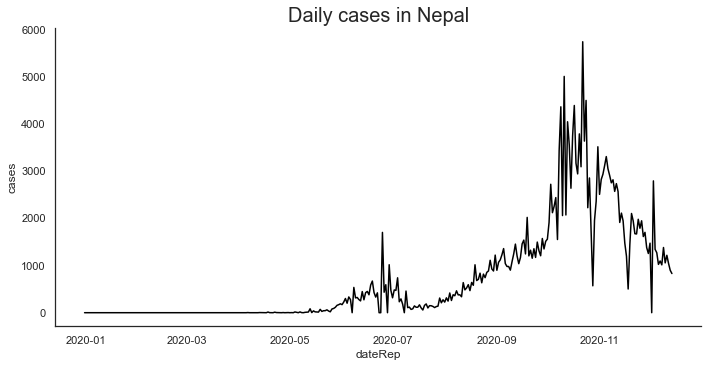

In [52]:
sns.set(style="white")
sns.relplot(x="dateRep", y="cases",  kind="line", height=5, 
    aspect=2,color='black', data=NP1)
plt.title('Daily cases in Nepal', fontsize=20)

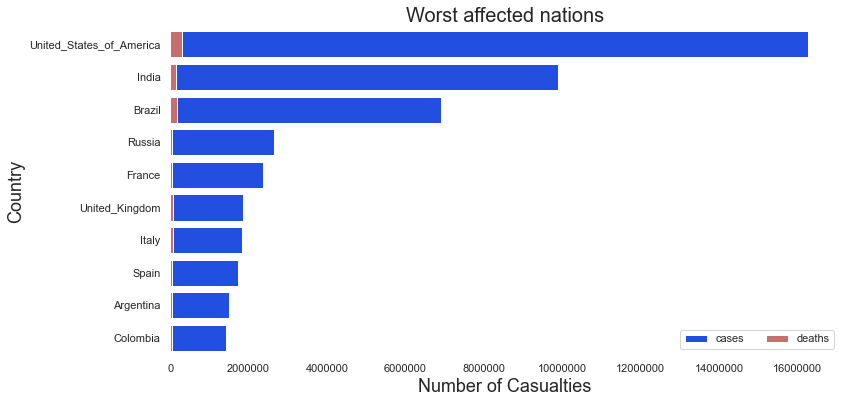

In [55]:
f, ax = plt.subplots(figsize = (12, 6))
ax.ticklabel_format(style='plain')
sns.set_color_codes('bright')
sns.barplot(x = 'cases', y = 'countriesAndTerritories', data = sorted_d2,
            label = 'cases', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'deaths', y = 'countriesAndTerritories', data = sorted_d2,
            label = 'deaths', color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
plt.title('Worst affected nations', fontsize=20)
plt.ylabel("Country", fontsize=18)
plt.xlabel("Number of Casualties", fontsize=18)
plt.show()

<AxesSubplot:xlabel='dateRep', ylabel='deaths'>

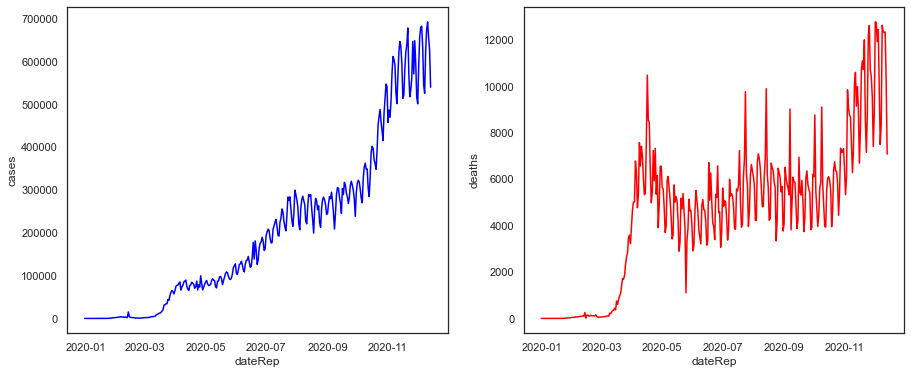

In [57]:
f, axes = plt.subplots(1, 2, sharey=False, figsize=(15, 6))
sns.lineplot(x="dateRep", y="cases", color='blue', ax=axes[0], data=ts2)
sns.lineplot(x="dateRep", y="deaths", color='red', ax=axes[1], data=ts2)

In [58]:
A = (df.loc[df['countriesAndTerritories'] == 'Nepal'])
A1 = A.groupby('dateRep')['cases','deaths'].sum()
A2 = A1.loc['2020-03-15':'2020-06-13']
A2 = A2.reset_index()


B = (df.loc[df['countriesAndTerritories'] == 'India'])
B1 = B.groupby('dateRep')['cases','deaths'].sum()
B2 = B1.loc['2020-03-15':'2020-06-13']
B2 = B2.reset_index()


C = (df.loc[df['countriesAndTerritories'] == 'Pakistan'])
C1 = C.groupby('dateRep')['cases','deaths'].sum()
C2 = C1.loc['2020-03-15':'2020-06-13']
C2 = C2.reset_index()


D = (df.loc[df['countriesAndTerritories'] == 'Afghanistan'])
D1 = D.groupby('dateRep')['cases','deaths'].sum()
D2 = D1.loc['2020-03-15':'2020-06-13']
D2 = D2.reset_index()


E = (df.loc[df['countriesAndTerritories'] == 'Sri_Lanka'])
E1 = E.groupby('dateRep')['cases','deaths'].sum()
E2 = E1.loc['2020-03-15':'2020-06-13']
E2 = E2.reset_index()


F = (df.loc[df['countriesAndTerritories'] == 'Bhutan'])
F1 = F.groupby('dateRep')['cases','deaths'].sum()
F2 = F1.loc['2020-03-15':'2020-06-13']
F2 = F2.reset_index()


G = (df.loc[df['countriesAndTerritories'] == 'Maldives'])
G1 = G.groupby('dateRep')['cases','deaths'].sum()
G2 = G1.loc['2020-03-15':'2020-06-13']
G2 = G2.reset_index()


H = (df.loc[df['countriesAndTerritories'] == 'Bangladesh'])
H1 = H.groupby('dateRep')['cases','deaths'].sum()
H2 = H1.loc['2020-03-15':'2020-06-13']
H2 = H2.reset_index()

C:\Users\user\AppData\Local\Temp/ipykernel_13388/1049255921.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\user\AppData\Local\Temp/ipykernel_13388/1049255921.py:8: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\user\AppData\Local\Temp/ipykernel_13388/1049255921.py:14: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\user\AppData\Local\Temp/ipykernel_13388/1049255921.py:20: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\user\AppData\Local\Temp/ipykernel_13388/1049255921.py:26: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\user\AppData\Local\Temp

In [59]:
a = A.groupby('countriesAndTerritories')['cases','deaths'].sum().reset_index()
b = B.groupby('countriesAndTerritories')['cases','deaths'].sum().reset_index()
c = C.groupby('countriesAndTerritories')['cases','deaths'].sum().reset_index()
d = D.groupby('countriesAndTerritories')['cases','deaths'].sum().reset_index()
e = E.groupby('countriesAndTerritories')['cases','deaths'].sum().reset_index()
f = F.groupby('countriesAndTerritories')['cases','deaths'].sum().reset_index()
g = G.groupby('countriesAndTerritories')['cases','deaths'].sum().reset_index()
h = H.groupby('countriesAndTerritories')['cases','deaths'].sum().reset_index()

C:\Users\user\AppData\Local\Temp/ipykernel_13388/1664203643.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\user\AppData\Local\Temp/ipykernel_13388/1664203643.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\user\AppData\Local\Temp/ipykernel_13388/1664203643.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\user\AppData\Local\Temp/ipykernel_13388/1664203643.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\user\AppData\Local\Temp/ipykernel_13388/1664203643.py:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\user\AppData\Local\Temp/ip

In [60]:
ddlj =  a.append([b,c, d, e, f, g, h])
ddlj

,countriesAndTerritories,cases,deaths
0,Nepal,248423,1698
0,India,9884100,143355
0,Pakistan,440787,8832
0,Afghanistan,49273,1971
0,Sri_Lanka,32790,152
0,Bhutan,438,0
0,Maldives,13368,48
0,Bangladesh,490533,7052


In [61]:
d1 = ddlj.sort_values('cases', ascending= False).reset_index().head(10)
d1

,index,countriesAndTerritories,cases,deaths
0,0,India,9884100,143355
1,0,Bangladesh,490533,7052
2,0,Pakistan,440787,8832
3,0,Nepal,248423,1698
4,0,Afghanistan,49273,1971
5,0,Sri_Lanka,32790,152
6,0,Maldives,13368,48
7,0,Bhutan,438,0


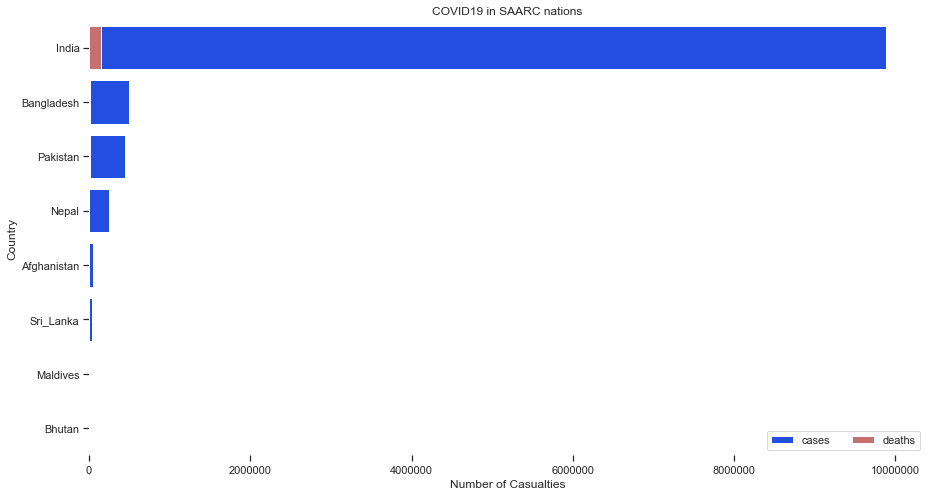

In [66]:
sns.set(style="ticks")
f, ax = plt.subplots(figsize = (15, 8))
ax.ticklabel_format(style='plain')
sns.set_color_codes('bright')
sns.barplot(x = 'cases', y = 'countriesAndTerritories', data = d1,
            label = 'cases', color = 'b', edgecolor = 'w')
sns.set_color_codes('muted')
sns.barplot(x = 'deaths', y = 'countriesAndTerritories', data = d1,
            label = 'deaths', color = 'r', edgecolor = 'w')
ax.legend(ncol = 2, loc = 'lower right')
sns.despine(left = True, bottom = True)
ax.set_title("COVID19 in SAARC nations")
plt.ylabel("Country")
plt.xlabel("Number of Casualties")
plt.show()

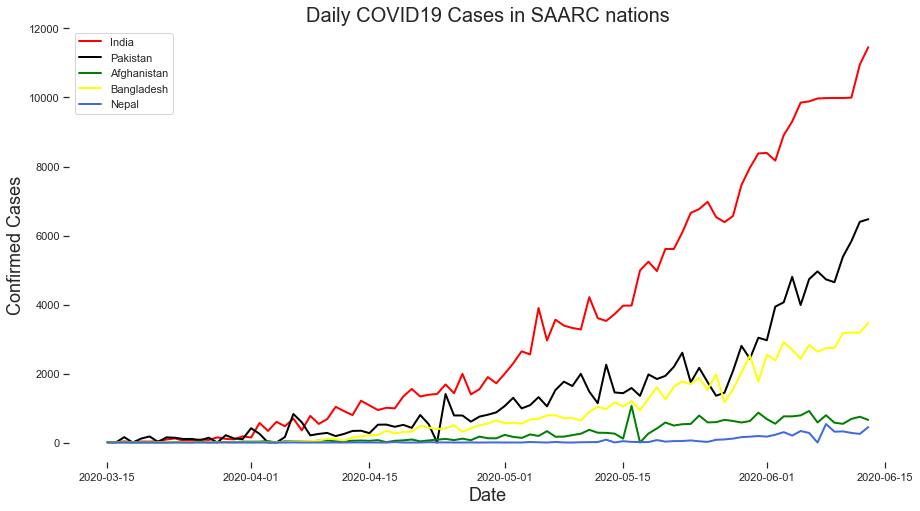

In [63]:
sns.set(style="ticks", rc={"lines.linewidth": 2})
f, axes = plt.subplots(1, sharey=False, figsize=(15, 8))
sns.lineplot(x="dateRep", y="cases", color='red', label="India", linestyle="-", data=B2)
sns.lineplot(x="dateRep", y="cases", color='black', label="Pakistan", linestyle="-",  data=C2)
sns.lineplot(x="dateRep", y="cases", color='green', label="Afghanistan", linestyle="-", data=D2)
sns.lineplot(x="dateRep", y="cases", color='yellow', label="Bangladesh", linestyle="-",  data=H2)
sns.lineplot(x="dateRep", y="cases", color='royalblue', label="Nepal", linestyle="-", data=A2)
axes.set_title("Daily COVID19 Cases in SAARC nations", fontsize=20)
sns.despine(left = True, bottom = True)
plt.legend(ncol = 1, loc = 'upper left')
plt.ylabel("Confirmed Cases", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.show()

C:\Users\user\AppData\Local\Temp/ipykernel_13388/695712493.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



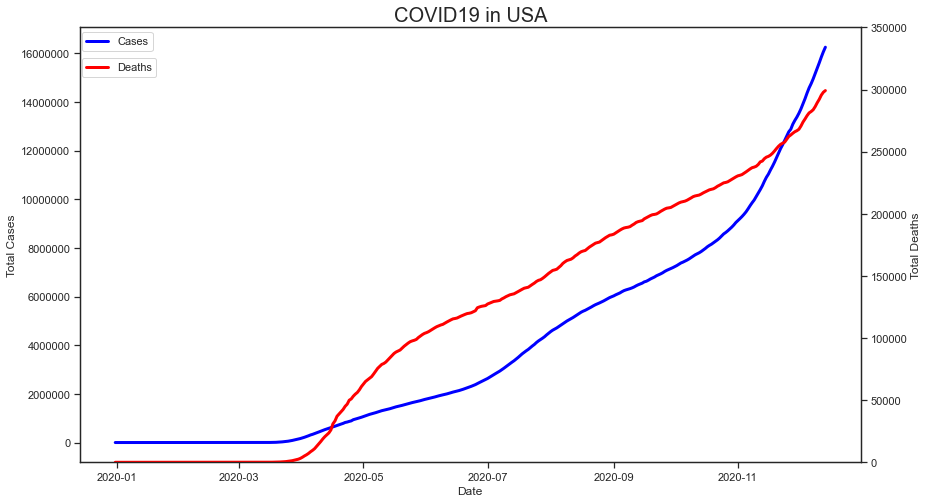

In [116]:
A = (df.loc[df['countriesAndTerritories'] == 'United_States_of_America'])
A1 = A.groupby('dateRep')['cases','deaths'].sum().reset_index()
A1['Cases'] = A1['cases'].cumsum()
A1['Deaths'] = A1['deaths'].cumsum()

sns.set(style="ticks", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots(figsize=(14,8))
ax2 = ax1.twinx()
ax1.ticklabel_format(style='plain')
sns.lineplot(data=A1, x="dateRep", y="Cases",  ax=ax1, label="Cases", color='blue')

sns.lineplot(data=A1, x="dateRep", y="Deaths", ax=ax2, label="Deaths", color='red')

ax1.set_xlabel("Date")
ax1.set_ylabel(r"Total Cases")
ax2.set_ylabel(r"Total Deaths")

ax1.legend(loc="upper left", bbox_to_anchor=(-0.07,0.93), bbox_transform=ax.transAxes)
ax2.legend(loc="upper left", bbox_to_anchor=(-0.07, 0.87), bbox_transform=ax.transAxes)

ax2.set_ylim(0, 350000)
ax.set_ylim(0,17000000)


plt.title("COVID19 in USA", fontsize=20)
plt.show()
sns.set()

C:\Users\user\AppData\Local\Temp/ipykernel_13388/2546218708.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



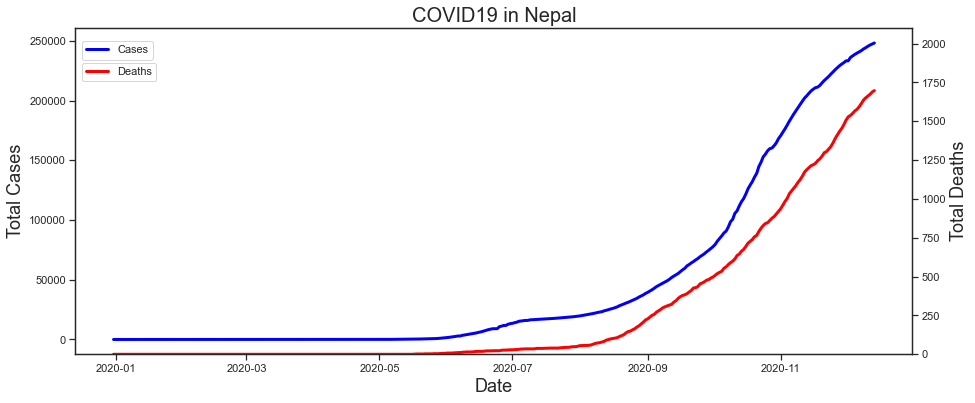

In [103]:
A = (df.loc[df['countriesAndTerritories'] == 'Nepal'])
A1 = A.groupby('dateRep')['cases','deaths'].sum().reset_index()
A1['Cases'] = A1['cases'].cumsum()
A1['Deaths'] = A1['deaths'].cumsum()

sns.set(style="ticks", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()

sns.lineplot(data=A1, x="dateRep", y="Cases",  ax=ax1, label="Cases", color='blue')

sns.lineplot(data=A1, x="dateRep", y="Deaths", ax=ax2, label="Deaths", color='red')

ax1.set_xlabel("Date", fontsize=18)
ax1.set_ylabel(r"Total Cases", fontsize=18)
ax2.set_ylabel(r"Total Deaths", fontsize=18)
ax2.set_ylim(0, 2100)
ax.set_ylim(0,25)

ax1.legend(loc="upper left", bbox_to_anchor=(-0.07,0.68), bbox_transform=ax.transAxes)
ax2.legend(loc="upper left", bbox_to_anchor=(-0.07,0.63), bbox_transform=ax.transAxes)

plt.title("COVID19 in Nepal", fontsize=20)
plt.show()
sns.set()



C:\Users\user\AppData\Local\Temp/ipykernel_13388/2150925783.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



<AxesSubplot:xlabel='dateRep', ylabel='Deaths'>

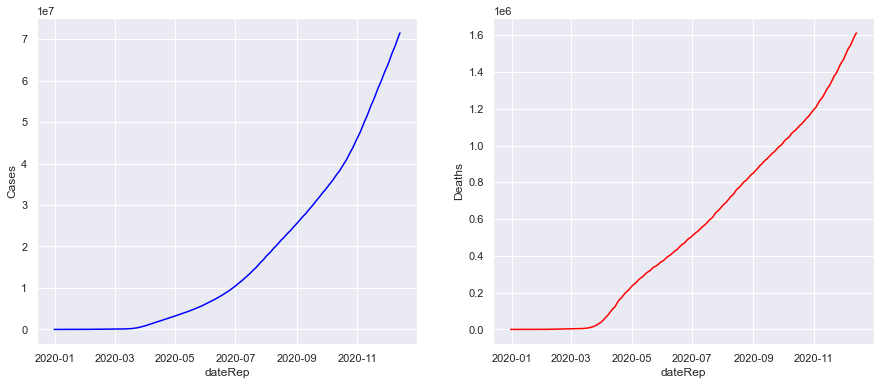

In [104]:
A1 = ts.groupby('dateRep')['cases','deaths'].sum().reset_index()
A1['Cases'] = A1['cases'].cumsum()
A1['Deaths'] = A1['deaths'].cumsum()

f, axes = plt.subplots(1, 2, sharey=False, figsize=(15, 6))
sns.lineplot(x="dateRep", y="Cases", color='blue', ax=axes[0], data=A1)
sns.lineplot(x="dateRep", y="Deaths", color='red', ax=axes[1], data=A1)

C:\Users\user\AppData\Local\Temp/ipykernel_13388/2457520707.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



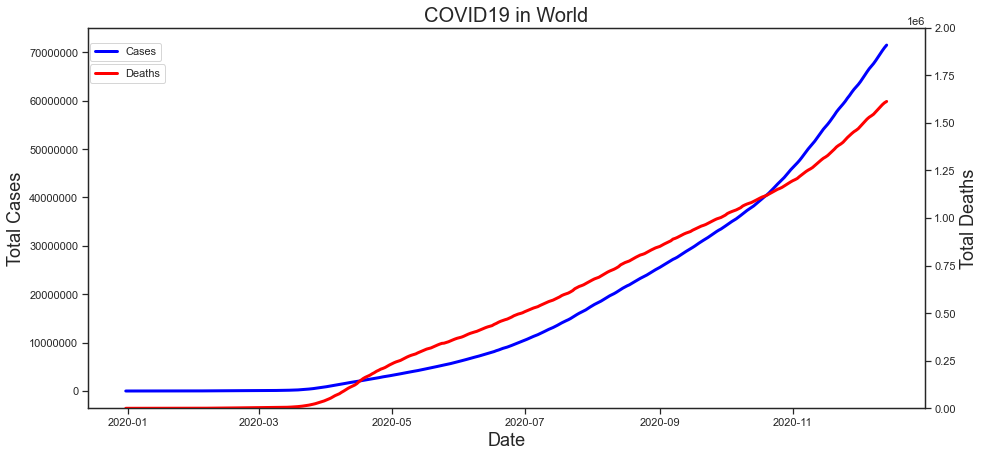

In [126]:
A1 = ts.groupby('dateRep')['cases','deaths'].sum().reset_index()
A1['Cases'] = A1['cases'].cumsum()
A1['Deaths'] = A1['deaths'].cumsum()
sns.set(style="ticks", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots(figsize=(15,7))
ax2 = ax1.twinx()
ax1.ticklabel_format(style='plain')
sns.lineplot(data=A1, x="dateRep", y="Cases",  ax=ax1, label="Cases", color='blue')

sns.lineplot(data=A1, x="dateRep", y="Deaths", ax=ax2, label="Deaths", color='red')

ax1.set_xlabel("Date", fontsize=18)
ax1.set_ylabel(r"Total Cases", fontsize=18)
ax2.set_ylabel(r"Total Deaths", fontsize=18)

ax2.set_ylim(0, 2000000)
ax.set_ylim(0,70000000)

ax1.legend(loc="upper left", bbox_to_anchor=(-0.06,0.8), bbox_transform=ax.transAxes)
ax2.legend(loc="upper left", bbox_to_anchor=(-0.06,0.75), bbox_transform=ax.transAxes)
plt.title("COVID19 in World", fontsize=20)
plt.show()
sns.set()

C:\Users\user\AppData\Local\Temp/ipykernel_13388/1700805845.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



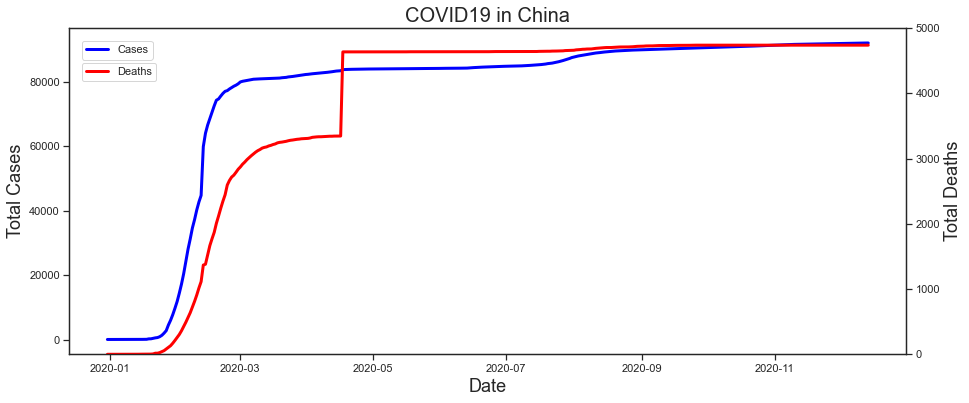

In [114]:
A = (df.loc[df['countriesAndTerritories'] == 'China'])
A1 = A.groupby('dateRep')['cases','deaths'].sum().reset_index()
A1['Cases'] = A1['cases'].cumsum()
A1['Deaths'] = A1['deaths'].cumsum()

sns.set(style="ticks", rc={"lines.linewidth": 3})

fig, ax1 = plt.subplots(figsize=(15,6))
ax2 = ax1.twinx()

sns.lineplot(data=A1, x="dateRep", y="Cases",  ax=ax1, label="Cases", color='blue')

sns.lineplot(data=A1, x="dateRep", y="Deaths", ax=ax2, label="Deaths", color='red')

ax1.set_xlabel("Date", fontsize=18)
ax1.set_ylabel(r"Total Cases", fontsize=18)
ax2.set_ylabel(r"Total Deaths", fontsize=18)

ax2.set_ylim(0, 5000)
ax.set_ylim(0,90000)

ax1.legend(loc="upper left", bbox_to_anchor=(-0.07,0.68), bbox_transform=ax.transAxes)
ax2.legend(loc="upper left", bbox_to_anchor=(-0.07,0.63), bbox_transform=ax.transAxes)

plt.title("COVID19 in China", fontsize=20)
plt.show()
sns.set()

C:\Users\user\AppData\Local\Temp/ipykernel_13388/245760531.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\user\AppData\Local\Temp/ipykernel_13388/245760531.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning:


statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar

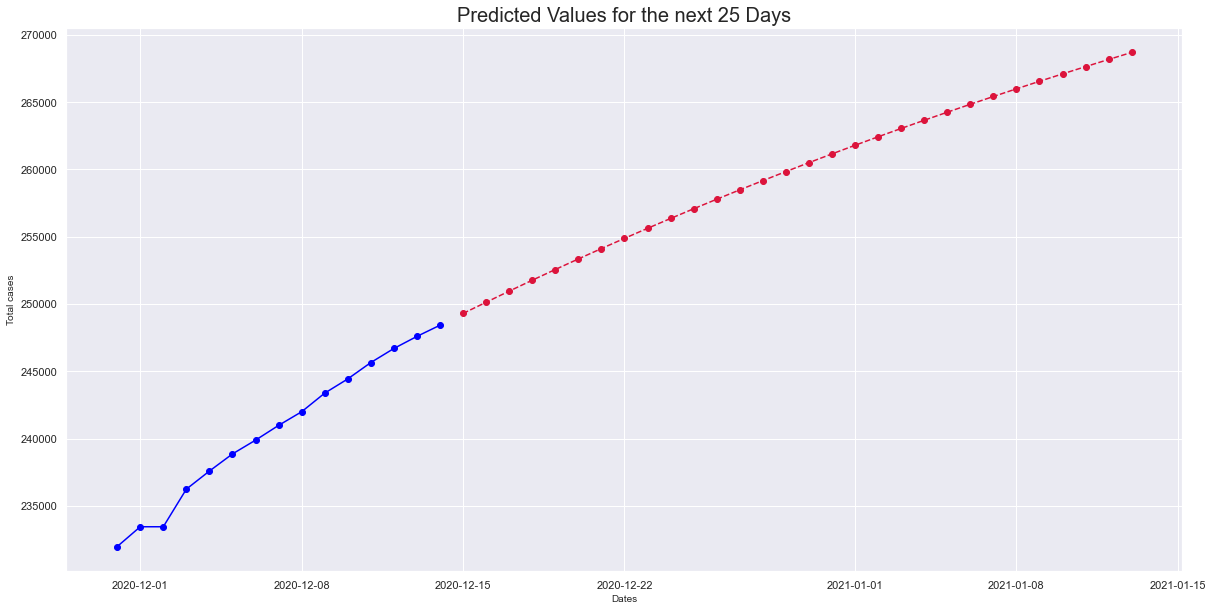

In [115]:
NP = (df.loc[df['countriesAndTerritories'] == 'Nepal'])
train =  NP.groupby('dateRep')['cases','deaths'].sum().reset_index()
test =  NP.groupby('dateRep')['cases','deaths'].sum().reset_index()
train['Cases'] = train['cases'].cumsum()
test['Cases'] = test['cases'].cumsum()

train.rename(columns={"dateRep":"ds","Cases":"y"},inplace=True)
test.rename(columns={"dateRep":"ds","Cases":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

from statsmodels.tsa.arima_model import ARIMA
import datetime
arima = ARIMA(train['y'], order=(3, 1, 0))
arima = arima.fit(trend='nc', full_output=True, disp=True)
forecast = arima.forecast(steps= 30)
pred = list(forecast[0])
start_date = train['ds'].max()
prediction_dates = []
for i in range(30):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (20,10))
plt.xlabel("Dates",fontsize = 10)
plt.ylabel('Total cases',fontsize = 10)
plt.title("Predicted Values for the next 25 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'crimson',label = 'Predicted')
plt.plot_date(y=train['y'].tail(15),x=train['ds'].tail(15),linestyle = '-',color = 'blue',label = 'Actual')
plt.style.use('bmh')